In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [99]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [101]:
df.duplicated().values.any()

False

In [102]:
df.drop(columns=['Unnamed: 0', 'title'], inplace=True)

In [103]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


<AxesSubplot:ylabel='label'>

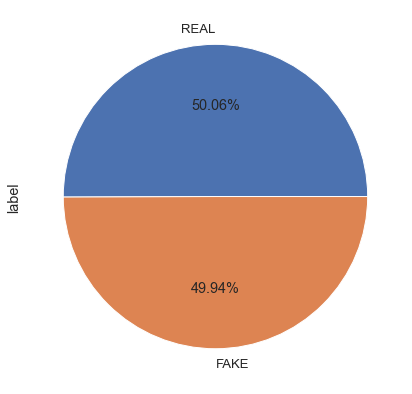

In [104]:
df['label'].value_counts().plot.pie(autopct='%.2f%%')

In [105]:
#analyze the total length of each message
df['length'] = df['text'].apply(len)
df.head()

,text,label,length
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,It's primary day in New York and front-runners...,REAL,1840


In [106]:
print(string.punctuation, '\n','\n')
print(stopwords.words('english'))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', '

In [107]:
def txt_preprocess(text):

    stpword = stopwords.words('english')
    
    #check if there are any punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    #join the chars
    nopunc = ''.join(nopunc)
    
    #remove any stopwords and convert to lower_case
    clean_stopwords = [word for word in nopunc.split() if word.lower() not in stpword]
    clean_words = ""
    
    #stemming
    for x in clean_stopwords:
        stemmer = SnowballStemmer("english")
        clean_words += (stemmer.stem(x)) + " "
        
    return clean_words

In [108]:
df['clean_text'] = df['text'].apply(txt_preprocess)

In [115]:
df['label'] = df['label'].map({'FAKE':1, 'REAL':0})

In [116]:
df.head()

,text,label,length,clean_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",1,7518,daniel greenfield shillman journal fellow free...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,2646,googl pinterest digg linkedin reddit stumbleup...
2,U.S. Secretary of State John F. Kerry said Mon...,0,2543,us secretari state john f kerri said monday st...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,2660,— kayde king kaydeek novemb 9 2016 lesson toni...
4,It's primary day in New York and front-runners...,0,1840,primari day new york frontrunn hillari clinton...


In [117]:
X = df['clean_text']
y = df['label']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [119]:
#vectorizer
vect = CountVectorizer()
vect.fit(X_train)  # learn training data vocabulary
X_train_dtm = vect.transform(X_train) # transform training data into a document-term matrix

# transform testing data into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [120]:
models = {
    "LOR": LogisticRegression(),
    "KNNC": KNeighborsClassifier(), 
    "Naive": MultinomialNB(),
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "XGBC": XGBClassifier(),
    "SVC": SVC()
}

In [121]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(X_train_dtm, y_train)
    Accuracy_train = model.score(X_train_dtm, y_train)
    print(f'Accuracy_train : {Accuracy_train}')
          
    y_pred = model.predict(X_test_dtm)
    Accuracy_test = accuracy_score(y_test, y_pred)
    print(f'Accuracy_test: {Accuracy_test}')  


------------------------------
Using model: LOR
Accuracy_train : 0.999605367008682
Accuracy_test: 0.9313338595106551
------------------------------
Using model: KNNC
Accuracy_train : 0.8569455406471981
Accuracy_test: 0.7932123125493291
------------------------------
Using model: Naive
Accuracy_train : 0.9329123914759274
Accuracy_test: 0.8823993685872139
------------------------------
Using model: DTC
Accuracy_train : 1.0
Accuracy_test: 0.8168902920284136
------------------------------
Using model: RFC
Accuracy_train : 1.0
Accuracy_test: 0.9037095501183899
------------------------------
Using model: XGBC
Accuracy_train : 0.9964483030781374
Accuracy_test: 0.9234411996842936
------------------------------
Using model: SVC
Accuracy_train : 0.926006314127861
Accuracy_test: 0.8895027624309392


In [122]:
model = LogisticRegression()
model.fit(X_train_dtm, y_train)
Accuracy_train = model.score(X_train_dtm, y_train)
print(f'Accuracy_train : {Accuracy_train}')

y_pred = model.predict(X_test_dtm)
Accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {Accuracy_test}')

Accuracy_train : 0.999605367008682
Accuracy_test: 0.9313338595106551


In [137]:
custom_data = ["It’s an act of desperation. When a presidential candidate decides that her only option is to try and destroy the credibility of the FBI, that’s not hubris, it’s fear of what the FBI might be about to reveal about her. \nDuring the original FBI investigation, Hillary Clinton was confident that she could ride it out. And she had good reason for believing that"]
custom_data = vect.transform(custom_data)

In [138]:
prediction = model.predict(custom_data)[0]
if prediction == 1:
    print('FAKE')
else:
    print('REAL')

FAKE


In [139]:
custom_data = ["us secretari state john f kerri said monday"]
custom_data = vect.transform(custom_data)

In [140]:
prediction = model.predict(custom_data)[0]
if prediction == 1:
    print('FAKE')
else:
    print('REAL')

REAL
